## Setup Python environment
Import tensorflow, keras, matplotlib and numby

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sb

## Prepare data
Import MNIST dataset from Kera's library

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train_f = x_train.reshape(len(x_train), 28 * 28) / 255
x_test_f = x_test.reshape(len(x_test), 28 * 28) / 255

## Create ANN with a hidden layer
Create and compile ANN with hidden layer

In [4]:
ann_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu"), # input layer
    keras.layers.Dense(10, activation="sigmoid") # hidden layer
])

ann_hidden.compile (optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train ANN

In [5]:
ann_hidden.fit(x_train_f, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2912 - accuracy: 0.9184
Epoch 2/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1314 - accuracy: 0.9619
Epoch 3/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0942 - accuracy: 0.9721
Epoch 4/7
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0719 - accuracy: 0.9786
Epoch 5/7
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0583 - accuracy: 0.9821 0s - loss: 0.0
Epoch 6/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0473 - accuracy: 0.9857
Epoch 7/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0401 - accuracy: 0.9877


Evaluate model

In [6]:
ann_hidden.evaluate(x_test_f, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0826 - accuracy: 0.9750


[0.08258827775716782, 0.9750000238418579]

Create predictions with new model

In [7]:
predictions_hidden = ann_hidden.predict(x_test_f)
predictions_hidden_labels = [np.argmax(prediction) for prediction in predictions_hidden]

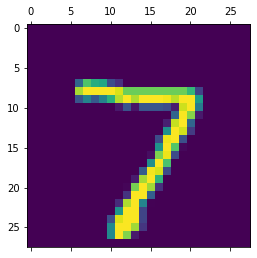

In [8]:
sample = 0
plot.matshow(x_test[sample])

In [9]:
predictions_hidden_labels[sample]

7

## Plot confusion matrix

<AxesSubplot:>

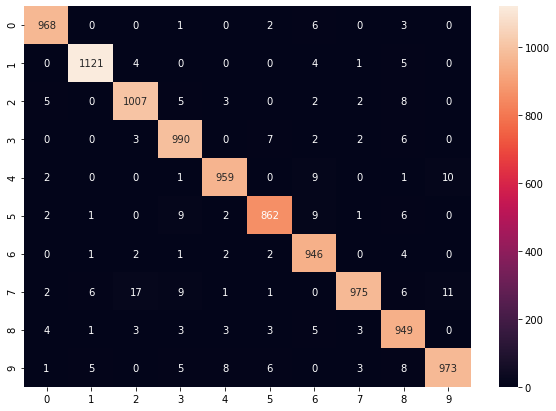

In [10]:
confusion_matrix_hidden = tf.math.confusion_matrix(labels=y_test, predictions=predictions_hidden_labels)

plot.figure(figsize = (10,7))
plot.xlabel('Predicted Value')
plot.ylabel('Truth Value')
sb.heatmap (confusion_matrix_hidden, annot=True, fmt='d')